In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## IMPORT DATA

ratings = pd.read_csv('tourism_rating.csv')

tourism = pd.read_excel('tourism_with_id.xlsx')

user_data = pd.read_csv('user.csv')

In [ ]:
## MISSING VALUES

# Ratings

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing values
missing_percentage = (ratings.isnull().sum() / len(ratings)) * 100

# Filter and display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Series([], dtype: float64)


In [ ]:
# Tourism

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing values
missing_percentage = (tourism.isnull().sum() / len(tourism)) * 100

# Filter and display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Time_Minutes     53.089245
Unnamed: 11     100.000000
dtype: float64


In [ ]:
# User Data

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing values
missing_percentage = (user_data.isnull().sum() / len(user_data)) * 100

# Filter and display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Series([], dtype: float64)


In [ ]:
# Explore Tourism further for missing values

tourism.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Observations :

Since more than 50% of the data in Time_Minutes is missing, lets drop that along with the two unnamed columns.

In [ ]:
# Drop Columns

tourism = tourism.drop(['Time_Minutes','Unnamed: 11','Unnamed: 12'],axis = 1)



In [ ]:
## EDA

# Tourism

tourism.describe()

,Place_Id,Price,Rating,Lat,Long
count,437.000000,437.000000,437.000000,437.000000,437.000000
mean,219.000000,24652.173913,4.442792,-7.095438,109.160142
std,126.295289,66446.374709,0.208587,0.727241,1.962848
min,1.000000,0.000000,3.400000,-8.197894,103.931398
25%,110.000000,0.000000,4.300000,-7.749590,107.578369
50%,219.000000,5000.000000,4.500000,-7.020524,110.237468
75%,328.000000,20000.000000,4.600000,-6.829411,110.431869
max,437.000000,900000.000000,5.000000,1.078880,112.821662


Observations:


Price: The price of visiting these tourism places shows a high variance. Many places are free or low-cost, as the 25th percentile of prices is 0. However, there are some luxury destinations with very high prices (up to 900,000), indicated by a large standard deviation (66,446). The median price (5,000) shows that half the places are quite affordable, while a small subset of expensive places drives the mean upwards (24,652).

Rating: Most tourism places have high ratings, with a minimum of 3.4 and a maximum of 5. The average rating is 4.44, and the majority of places have ratings above 4.3 (as indicated by the 25th percentile). This suggests that tourists generally have good experiences at these destinations.

Latitude (Lat): The locations of tourism spots are mostly concentrated in the southern hemisphere, as the latitude values range between -8.19 and 1.08, with a mean of -7.09. The 25th, 50th, and 75th percentiles all fall between -8.2 and -6.83, indicating that most places are near the equator.

Longitude (Long): The longitude values range between 103.93 and 112.82, with a mean of 109.16, suggesting that the tourism places are clustered within a narrow longitudinal range.

Key Takeaway: The dataset provides a diverse range of tourism destinations, with the majority being affordable and highly rated. Most places are located in the southern hemisphere, relatively close to the equator, which could imply tropical or warm-weather destinations.

In [ ]:
# User Data

user_data.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


Observations:

Age: The ages of the users range from 18 to 40 years old. The mean age is 28.7 years, with a standard deviation of 6.39, indicating that most users are relatively young adults. The median age is 29, suggesting a slight skew towards younger users. The 25th percentile shows that a quarter of the users are 24 years old or younger, while the 75th percentile reveals that a quarter are 34 years or older.

Key Takeaway: The users in this dataset represent a young demographic, mostly in their late 20s to early 30s. There is a reasonably broad age range, but the data is clustered around the late 20s, as indicated by the median and quartile values.

In [ ]:
# Ratings

ratings.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Observations:

Place_Ratings: The ratings given to places range from 1 to 5, with an average rating of 3.07. The standard deviation of 1.38 indicates that the ratings vary widely, but the 25th percentile (2.0) and 75th percentile (4.0) suggest that a significant portion of the ratings cluster around the middle range. The median rating is 3, indicating that most places received an average rating.

Key Takeaway: The dataset shows a diverse group of users rating a wide range of places, with ratings spread between 1 and 5. The median rating of 3 suggests that many places receive average reviews, but there are significant portions that are rated either very low or very high, as indicated by the 25th and 75th percentiles.

   User_Id  Place_Id  Place_Ratings               Location  Age
0        1       179              3  Semarang, Jawa Tengah   20
1        1       344              2  Semarang, Jawa Tengah   20
2        1         5              5  Semarang, Jawa Tengah   20
3        1       373              3  Semarang, Jawa Tengah   20
4        1       101              4  Semarang, Jawa Tengah   20
count    10000.000000
mean        28.726200
std          6.355004
min         18.000000
25%         24.000000
50%         29.000000
75%         34.000000
max         40.000000
Name: Age, dtype: float64


Text(0.5, 0, 'Age')

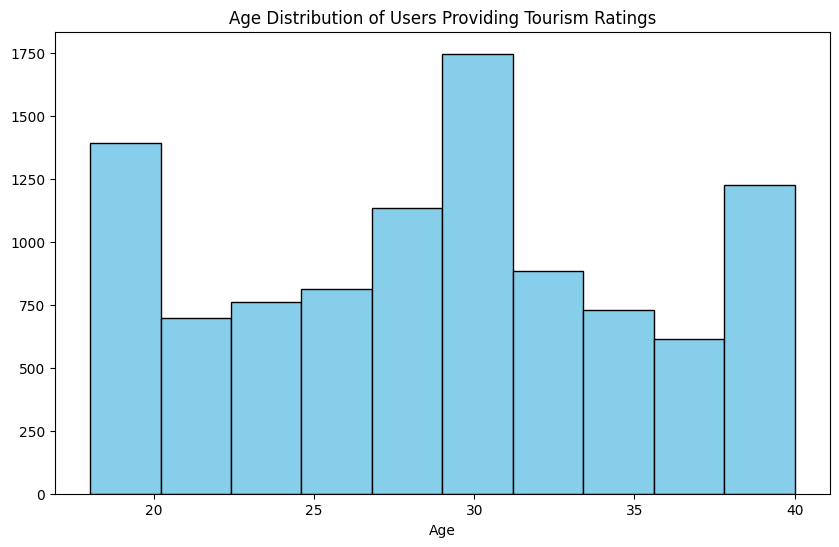

In [ ]:
# MERGE USER AND RATINGS

# Merge user_data with ratings on 'User_Id'
user_ratings = pd.merge(ratings, user_data, on='User_Id')

# Display the merged data to ensure it's correct
print(user_ratings.head())

# Analyze the age distribution of users providing ratings
age_distribution = user_ratings['Age'].describe()
print(age_distribution)

# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(user_ratings['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Age Distribution of Users Providing Tourism Ratings')
plt.xlabel('Age')

Observations on the Age Distribution of Users Providing Tourism Ratings:

Age 30 has the highest number of users providing ratings, with nearly 1,750 users. This suggests that users in their early 30s are the most active group in providing feedback on tourism destinations.

Age 20 also shows a significant number of users, with around 1,300 users contributing ratings, indicating that young adults in their early 20s are quite engaged in tourism activities and sharing their experiences.

Age 40 follows closely, with over 1,200 users providing ratings, highlighting that middle-aged adults are also heavily involved in the tourism scene.

Age groups in the mid-20s and late 30s have relatively fewer users providing ratings, with numbers around 800 to 1,000 users in each age bracket. This suggests a slight dip in activity for individuals in their late 20s and late 30s when it comes to rating tourist spots.

The overall distribution is somewhat U-shaped, with the lowest user activity seen around ages 24 and 35, but higher participation at younger (20-22) and older (30-40) age ranges.

Summary:

The most active age groups in providing tourism ratings are users around the ages of 30, 20, and 40.

There's a noticeable dip in user activity in the mid-20s and mid-30s age brackets.

Tourism platforms might benefit from targeted engagement strategies to attract users in their late 20s and mid-30s to provide more ratings.

This distribution highlights key user demographics for tourism-related feedback, which could help in designing personalized experiences or marketing strategies aimed at these age groups.


Top 10 Locations where most users are coming from:
Location
Bekasi, Jawa Barat              39
Semarang, Jawa Tengah           22
Yogyakarta, DIY                 20
Lampung, Sumatera Selatan       20
Bogor, Jawa Barat               17
Jakarta Selatan, DKI Jakarta    14
Subang, Jawa Barat              14
Cirebon, Jawa Barat             14
Depok, Jawa Barat               12
Ponorogo, Jawa Timur            11
Name: count, dtype: int64


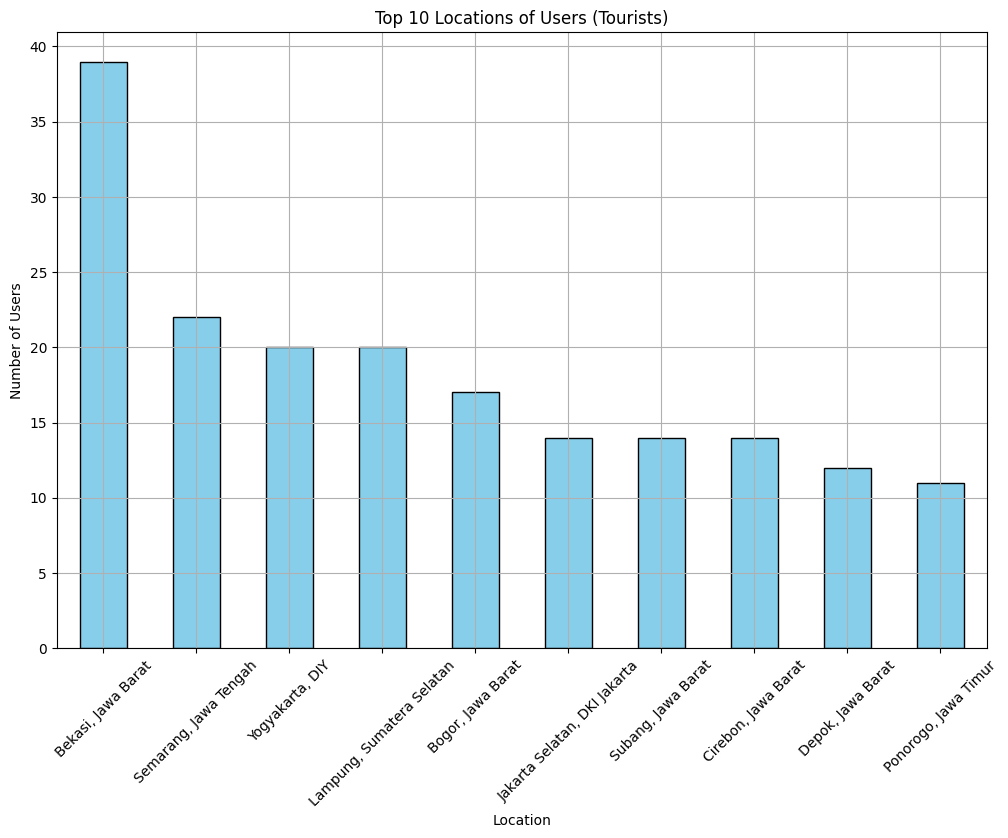

In [ ]:
# Analyze where the users are coming from

# Check if the 'Location' column exists
if 'Location' in user_data.columns:
    # Count the number of users by location
    location_counts = user_data['Location'].value_counts()

    # Display the top 10 locations
    print("Top 10 Locations where most users are coming from:")
    print(location_counts.head(10))

    # Plot the distribution of users by location
    plt.figure(figsize=(12, 8))
    location_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Locations of Users (Tourists)')
    plt.xlabel('Location')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("The 'Location' column does not exist in the user_data.")

Observations on the Top 10 Locations of Users (Tourists):

Bekasi, Jawa Barat has the highest number of users (nearly 40 users), indicating that it is a significant source of tourists who participate in rating tourism destinations.

Semarang, Jawa Tengah and Yogyakarta, DIY follow with around 20 users each, making these central Java locations key areas for tourist engagement.

Lampung, Sumatera Selatan and Bogor, Jawa Barat also have a notable presence, with each contributing around 20 users, indicating that these regions in South Sumatra and West Java have an active tourist population.

Jakarta Selatan, DKI Jakarta and Subang, Jawa Barat contribute around 15 users each, showing moderate activity from these locations.

Cirebon, Jawa Barat and Depok, Jawa Barat have similar numbers, each with about 15 users, representing important tourist demographics from West Java.

Ponorogo, Jawa Timur rounds out the list with around 10 users, indicating some activity from this East Java location but relatively less compared to other regions.

Summary:

West Java (Jawa Barat) dominates the top 10 list, with several cities contributing significantly to the user base, especially Bekasi, which has the highest number of users.

Central Java (Jawa Tengah) and Yogyakarta also play a crucial role in contributing tourists who actively rate destinations.

Jakarta and regions in South Sumatra are also well-represented, though they contribute fewer users compared to West Java and Central Java.

This distribution suggests that a majority of active tourists who rate destinations come from major cities in West Java, Central Java, and Yogyakarta, providing insights into which regions tourism platforms might target for user engagement or promotional activities.

Categories of Tourist Spots:
Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64


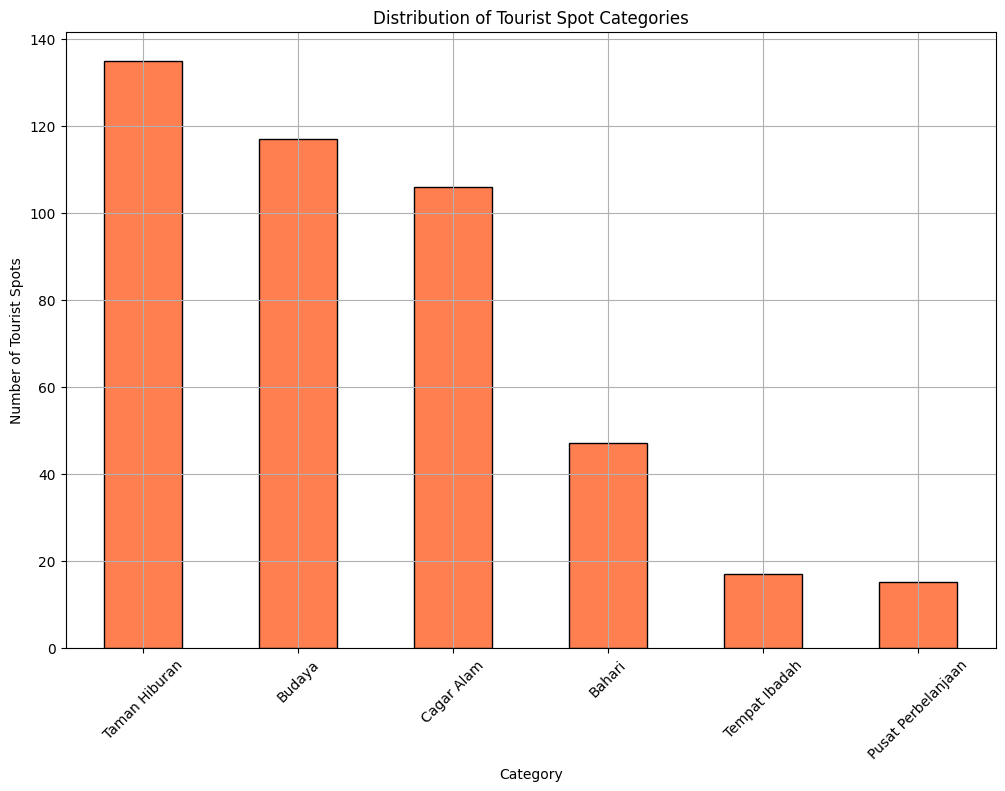

In [ ]:
# Different Categories of Tourist Spots

# Check if the 'Category' or 'Purpose' column exists
if 'Category' in tourism.columns:
    # Count the number of tourist spots by category
    category_counts = tourism['Category'].value_counts()

    # Display the categories and their counts
    print("Categories of Tourist Spots:")
    print(category_counts)

    # Plot the distribution of categories
    plt.figure(figsize=(12, 8))
    category_counts.plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Distribution of Tourist Spot Categories')
    plt.xlabel('Category')
    plt.ylabel('Number of Tourist Spots')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

elif 'Purpose' in tourism.columns:
    # Count the number of tourist spots by purpose (if 'Category' doesn't exist)
    purpose_counts = tourism['Purpose'].value_counts()

    # Display the purposes and their counts
    print("Purposes of Tourist Spots:")
    print(purpose_counts)

    # Plot the distribution of purposes
    plt.figure(figsize=(12, 8))
    purpose_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Distribution of Tourist Spot Purposes')
    plt.xlabel('Purpose')
    plt.ylabel('Number of Tourist Spots')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

else:
    print("No 'Category' or 'Purpose' column exists in the dataset.")


Observations on the Distribution of Tourist Spot Categories:

Taman Hiburan (Amusement Parks) has the highest number of tourist spots, with nearly 140 spots, indicating its popularity as a tourist attraction.

Budaya (Cultural sites) follows closely behind, with over 120 tourist spots, showcasing a significant interest in cultural tourism.

Cagar Alam (Nature Reserves) ranks third, with just over 100 tourist spots, suggesting that natural and environmental tourism is also highly popular.

Bahari (Marine Tourism) has around 80 tourist spots, indicating a good presence of water-based or coastal tourism destinations.

Tempat Ibadah (Religious Sites) and Pusat Perbelanjaan (Shopping Centers) have relatively fewer tourist spots, each under 40. This suggests that while they are part of the tourism scene, they are not the most dominant types of attractions in this dataset.

Summary:

The distribution highlights a preference for amusement, cultural, and nature-related tourist spots.

Water-based and religious tourism have a notable presence but are less dominant compared to amusement parks and cultural tourism.

Shopping centers represent the smallest category, indicating they are not a major focus in the tourism categories analyzed.

These insights can guide decisions on tourism development or marketing efforts, based on the types of attractions that dominate the landscape.

Most Famous/Suitable Type of Tourism by City:
          City       Category  Counts
1      Bandung     Cagar Alam      54
6      Jakarta         Budaya      32
13    Semarang     Cagar Alam      20
17    Surabaya         Budaya      18
26  Yogyakarta  Taman Hiburan      36


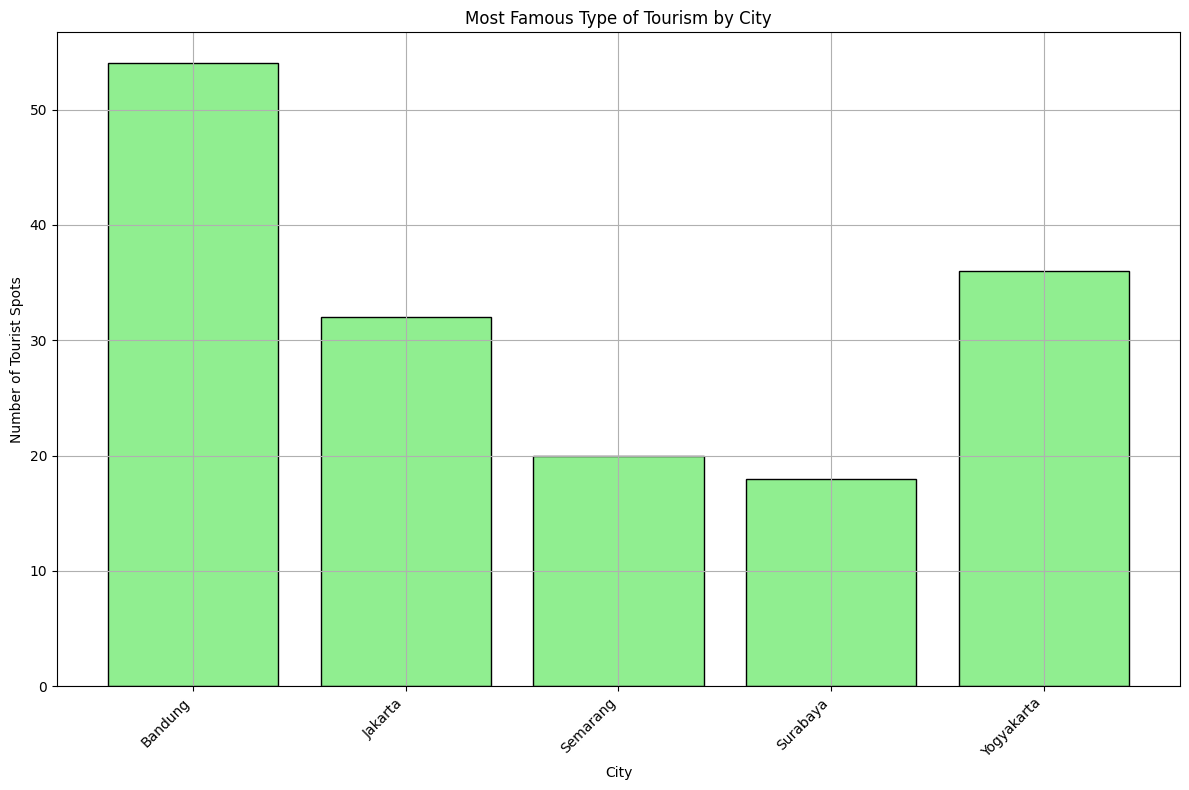

In [ ]:
# Analyzing each location and the tourism its convenient for


if 'City' in tourism.columns and 'Category' in tourism.columns:
    # Group by 'City' and 'Category' if 'Category' doesn't exist
    tourism_by_location = tourism.groupby(['City', 'Category']).size().reset_index(name='Counts')

    # For each location, find the purpose with the highest count
    most_famous_tourism = tourism_by_location.loc[tourism_by_location.groupby('City')['Counts'].idxmax()]


    # Display the result
    print("Most Famous/Suitable Type of Tourism by City:")
    print(most_famous_tourism)

    # Plotting the result
    plt.figure(figsize=(12, 8))
    plt.bar(most_famous_tourism['City'], most_famous_tourism['Counts'], color='lightgreen', edgecolor='black')
    plt.title('Most Famous Type of Tourism by City')
    plt.xlabel('City')
    plt.ylabel('Number of Tourist Spots')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("The dataset must have 'Location' and either 'Category' or 'Purpose' columns.")

Observations on the Most Famous Type of Tourism by City:

Bandung stands out as the city with the highest number of tourist spots, having over 50 famous tourist destinations. This makes Bandung a top choice for tourism and highlights its diverse attractions, potentially ranging from natural to cultural tourism.

Yogyakarta follows, with around 40 tourist spots. Known for its rich cultural heritage, Yogyakarta is a major tourist hub, attracting visitors for historical and cultural tourism.

Jakarta, the capital city, has around 30 tourist spots, reflecting its importance as a major tourism destination, likely centered around urban, cultural, and historical tourism.

Semarang and Surabaya both have fewer tourist spots, with Semarang slightly ahead of Surabaya. These cities are known for their cultural and historical significance, though they host fewer famous tourist spots compared to the larger cities like Bandung and Yogyakarta.

Summary:
Bandung and Yogyakarta are leading cities in terms of tourism spots, offering a variety of attractions and serving as major tourist destinations in Indonesia.

Jakarta, being the capital, holds its own with a substantial number of tourist spots, but not as many as Bandung.

Semarang and Surabaya have a smaller number of famous tourism spots, indicating a more localized or niche tourism appeal compared to the other cities.


These insights suggest that Bandung and Yogyakarta should remain focal points for tourism promotion, while Jakarta, Semarang, and Surabaya offer opportunities for targeted tourism campaigns.


Based on this Analysis, I would recommend a nature lover to visit Bandung as it has the highest number of Cagar Alam (National Parks).

In [ ]:
# Merge the 'Place_Name' column from 'tourism' into 'user_ratings' based on 'Place_Id'
user_ratings = pd.merge(user_ratings, tourism[['Place_Id', 'Place_Name']], on='Place_Id', how='left')

# Display the merged dataset to check the results
print(user_ratings.head())


   User_Id  Place_Id  Place_Ratings               Location  Age  \
0        1       179              3  Semarang, Jawa Tengah   20   
1        1       344              2  Semarang, Jawa Tengah   20   
2        1         5              5  Semarang, Jawa Tengah   20   
3        1       373              3  Semarang, Jawa Tengah   20   
4        1       101              4  Semarang, Jawa Tengah   20   

                      Place_Name  
0                Candi Ratu Boko  
1                  Pantai Marina  
2       Atlantis Water Adventure  
3         Museum Kereta Ambarawa  
4  Kampung Wisata Sosro Menduran  


Top 10 Most Loved Tourist Spots:
     Place_Id  avg_rating  num_ratings                             Place_Name
415       416    3.967742           31                       Keraton Surabaya
138       139    3.882353           17  Puncak Gunung Api Purba - Nglanggeran
51         52    3.842105           19                           Kampung Cina
253       254    3.789474           19                 Teras Cikapundung BBWS
96         97    3.772727           22                  Monumen Yogya Kembali
321       322    3.766667           30                            Bukit Jamur
111       112    3.764706           17               Bukit Bintang Yogyakarta
0           1    3.722222           18                       Monumen Nasional
320       321    3.714286           21            Glamping Lakeside Rancabali
156       157    3.695652           23                           Pantai Baron


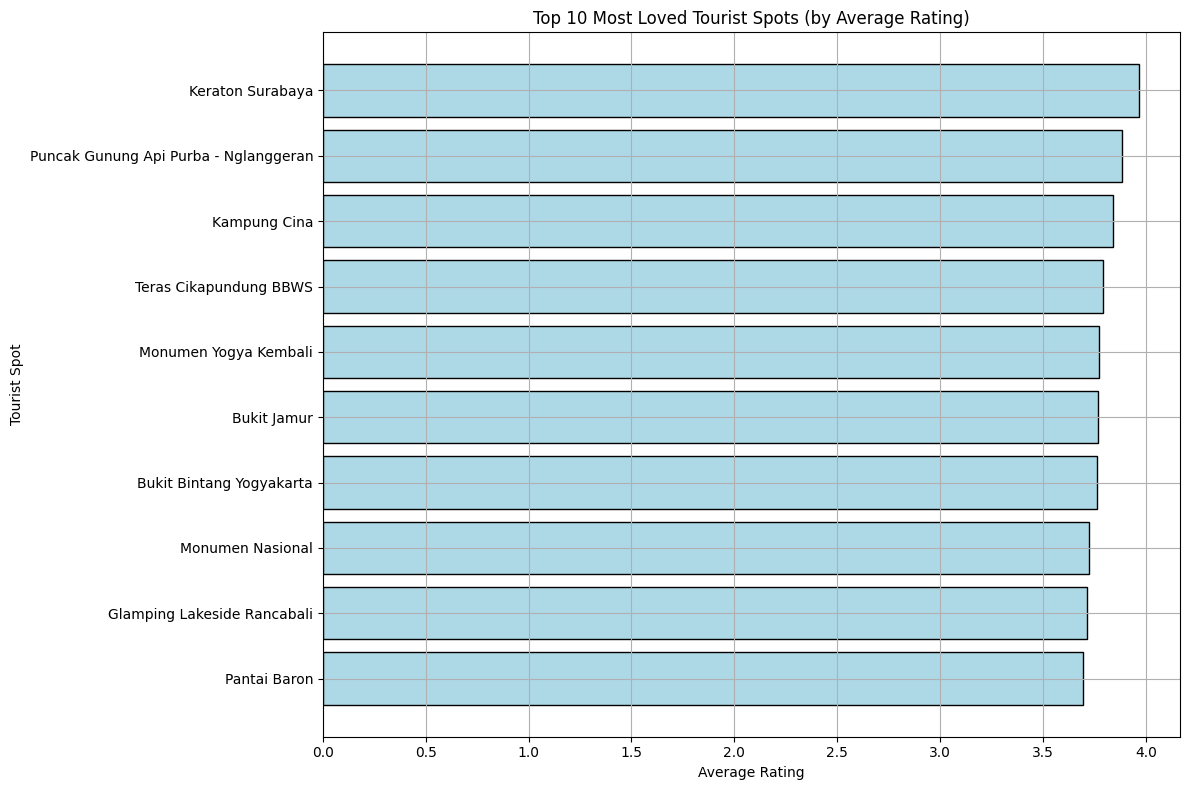

In [ ]:
## Most Loved Tourist Spots

# Step 1: Calculate the average rating for each tourist spot
most_loved_spots = user_ratings.groupby('Place_Id').agg(
    avg_rating=('Place_Ratings', 'mean'),
    num_ratings=('Place_Ratings', 'count')
).reset_index()

# Merge with tourist spot names (if applicable)
if 'Place_Name' in user_ratings.columns:
    most_loved_spots = most_loved_spots.merge(user_ratings[['Place_Id', 'Place_Name']].drop_duplicates(), on='Place_Id')

# Step 2: Sort the spots by average rating in descending order
most_loved_spots = most_loved_spots.sort_values(by='avg_rating', ascending=False)

# Display the top 10 most loved tourist spots
print("Top 10 Most Loved Tourist Spots:")
print(most_loved_spots.head(10))

# Step 3: Visualize the top 10 most loved tourist spots
plt.figure(figsize=(12, 8))
plt.barh(most_loved_spots['Place_Name'].head(10), most_loved_spots['avg_rating'].head(10), color='lightblue', edgecolor='black')
plt.title('Top 10 Most Loved Tourist Spots (by Average Rating)')
plt.xlabel('Average Rating')
plt.ylabel('Tourist Spot')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rated at the top
plt.grid(True)
plt.tight_layout()
plt.show()

Observations on the Top 10 Most Loved Tourist Spots:

Keraton Surabaya tops the list of most loved tourist spots, indicating it has consistently received high ratings from visitors.

Puncak Gunung Api Purba - Nglanggeran and Kampung Cina also rank highly, showing they are well-regarded by tourists and have a strong appeal.

Teras Cikapundung BBWS and Monumen Yogya Kembali continue to show that heritage and cultural tourism spots are loved by visitors, with both spots appearing in the top 5.

Monumen Nasional (National Monument) remains one of the iconic tourist spots, highlighting its significance in Indonesian tourism.

Other spots such as:

Bukit Jamur
Bukit Bintang Yogyakarta
Glamping Lakeside Rancabali
Pantai Baron
All of these locations have also received high ratings, showing they are favored by tourists for their unique experiences, such as nature, adventure, or cultural value.

Summary:
The most loved spots encompass a mix of cultural, historical, and natural attractions.

Iconic monuments like Monumen Nasional and Monumen Yogya Kembali continue to attract and impress visitors.

Unique nature spots such as Pantai Baron and Puncak Gunung Api Purba also feature prominently, reflecting the diverse interests of tourists.


This list provides valuable insights into the types of tourist spots that resonate most with visitors, which can be useful for tourism development or marketing strategies focused on enhancing visitor experience.

Cities with the Most Loved Tourist Spots:
         City  avg_city_rating  total_spots
4  Yogyakarta         3.103519          126
0     Bandung         3.079645          124
3    Surabaya         3.060591           46
2    Semarang         3.035216           57
1     Jakarta         3.019858           84


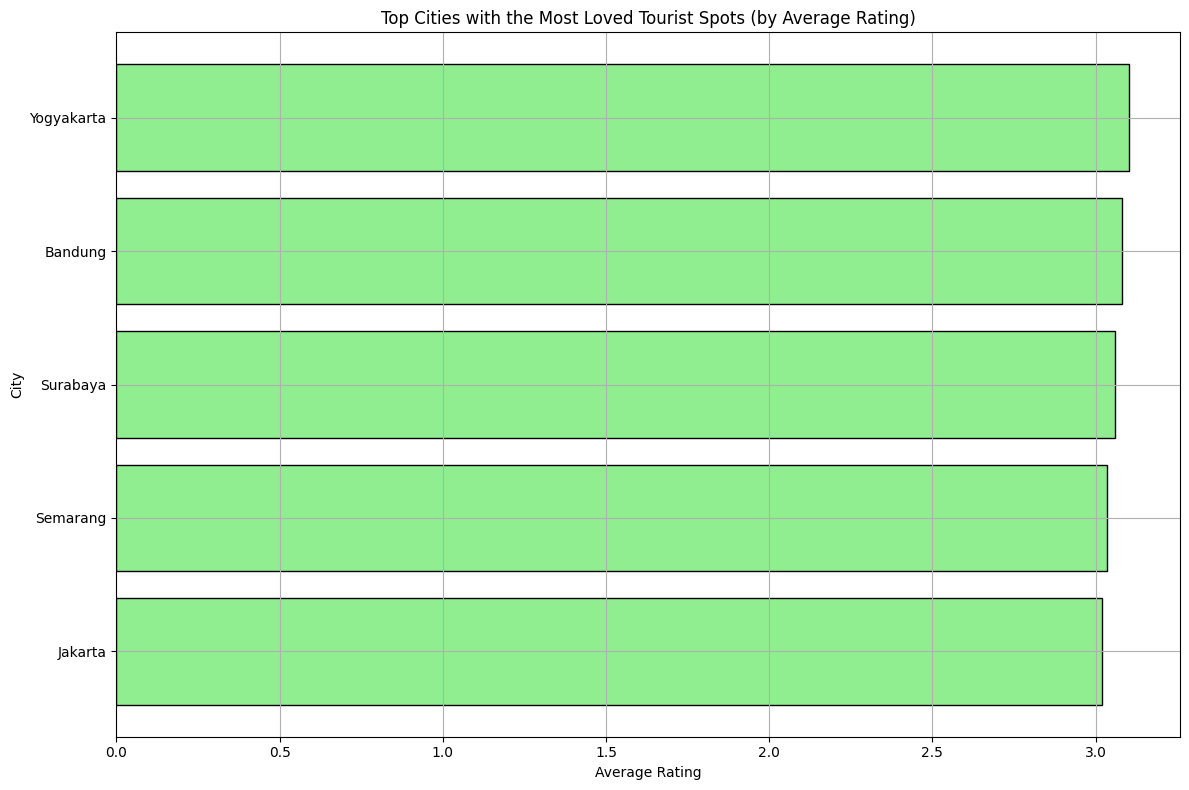

In [ ]:
## Cities containing most loved tourist spots

# Step 1: Merge city information with user ratings
merged_data_with_city = pd.merge(user_ratings, tourism[['Place_Id', 'City']], on='Place_Id', how='left')

# Step 2: Calculate the average rating for each tourist spot
avg_ratings_per_spot = merged_data_with_city.groupby('Place_Id').agg(
    avg_rating=('Place_Ratings', 'mean')
).reset_index()

# Merge the average ratings back with the city information
merged_avg_ratings = pd.merge(avg_ratings_per_spot, tourism[['Place_Id', 'City', 'Place_Name']], on='Place_Id', how='left')

# Step 3: Group by city to find the city with the highest average rating or most loved spots
city_loved_spots = merged_avg_ratings.groupby('City').agg(
    avg_city_rating=('avg_rating', 'mean'),  # Calculate average rating for each city
    total_spots=('Place_Id', 'count')  # Count total number of spots in each city
).reset_index()

# Step 4: Sort by average rating or number of spots to find the city with the most loved spots
city_loved_spots = city_loved_spots.sort_values(by='avg_city_rating', ascending=False)

# Display the top cities with the most loved tourist spots
print("Cities with the Most Loved Tourist Spots:")
print(city_loved_spots.head())

# Visualization of the cities with the most loved tourist spots
plt.figure(figsize=(12, 8))
plt.barh(city_loved_spots['City'].head(10), city_loved_spots['avg_city_rating'].head(10), color='lightgreen', edgecolor='black')
plt.title('Top Cities with the Most Loved Tourist Spots (by Average Rating)')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rated at the top
plt.grid(True)
plt.tight_layout()
plt.show()

Observations on the Top Cities with the Most Loved Tourist Spots (by Average Rating):

Yogyakarta ranks as the top city with the most loved tourist spots based on average rating. This is not surprising given Yogyakarta's reputation for its rich cultural heritage and historical landmarks, which are highly appreciated by tourists.

Bandung follows closely, showcasing the city's appeal, likely due to its mix of natural attractions, cool climate, and vibrant arts scene.

Surabaya holds a strong position, indicating that this major city in East Java is well-regarded for its tourist destinations, including cultural sites and historical landmarks.

Semarang also ranks highly, reflecting its historical importance and the city's significant colonial architecture, which is a major draw for visitors.

Jakarta, Indonesia’s bustling capital, rounds out the top cities with highly loved tourist spots. Despite being a metropolitan hub, the city offers several iconic landmarks and attractions that tourists rate highly.

Summary:
The cities with the most loved tourist spots are a mix of cultural, historical, and urban destinations.

Yogyakarta and Bandung are especially strong contenders, emphasizing the importance of cultural and natural tourism in these regions.

Jakarta's presence shows that urban tourism and iconic landmarks in a busy capital city can still attract high ratings from visitors.


This analysis provides a clear picture of where tourists are most satisfied with their experiences and highlights potential areas of focus for tourism development and promotion.

Most Liked Categories:
             Category  avg_category_rating  num_ratings
4       Taman Hiburan             3.117917         3053
2          Cagar Alam             3.080745         2415
5       Tempat Ibadah             3.080519          385
1              Budaya             3.034663         2683
0              Bahari             3.006487         1079
3  Pusat Perbelanjaan             2.945455          385


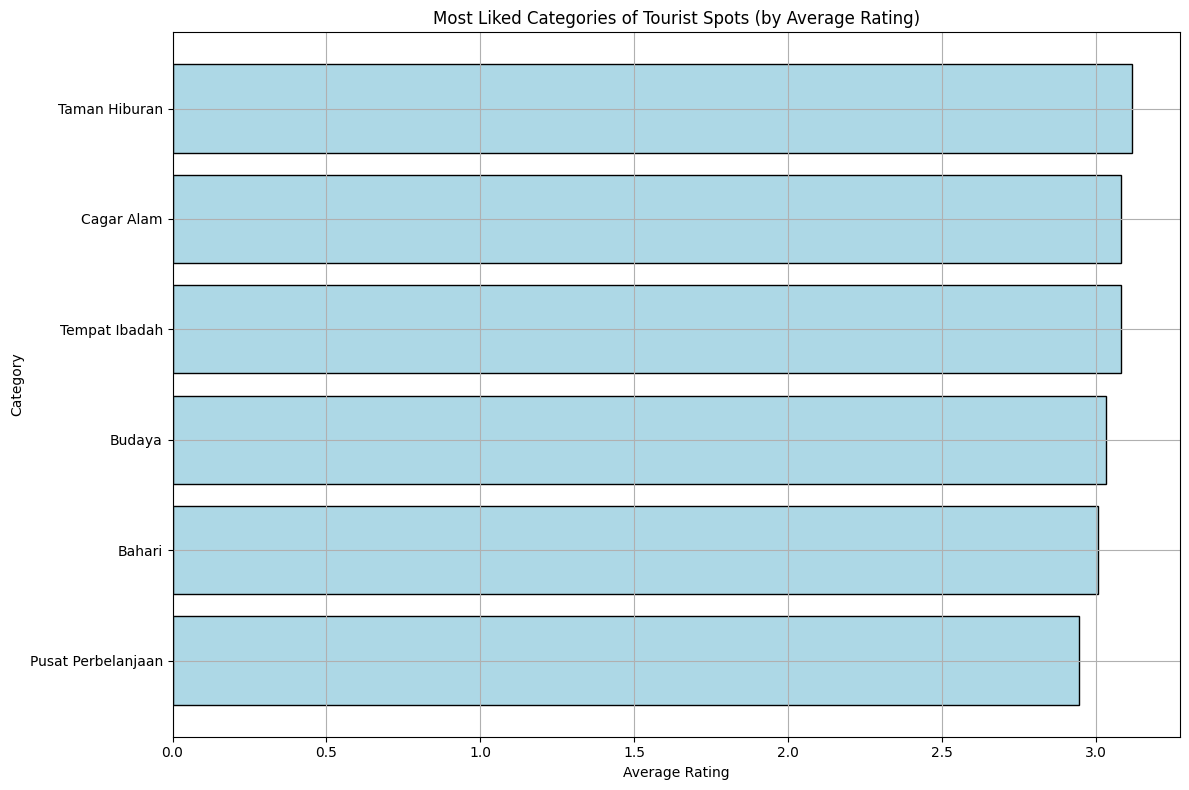

In [ ]:
## Category of places most loved by tourists

# Step 1: Merge category information with user ratings
merged_data_with_category = pd.merge(user_ratings, tourism[['Place_Id', 'Category']], on='Place_Id', how='left')

# Step 2: Calculate the average rating for each category
avg_ratings_per_category = merged_data_with_category.groupby('Category').agg(
    avg_category_rating=('Place_Ratings', 'mean'),  # Calculate average rating for each category
    num_ratings=('Place_Ratings', 'count')  # Count the number of ratings for each category
).reset_index()

# Step 3: Sort by average rating to identify the most liked categories
most_liked_categories = avg_ratings_per_category.sort_values(by='avg_category_rating', ascending=False)

# Display the most liked categories
print("Most Liked Categories:")
print(most_liked_categories)

# Optional: Visualization of the most liked categories
plt.figure(figsize=(12, 8))
plt.barh(most_liked_categories['Category'], most_liked_categories['avg_category_rating'], color='lightblue', edgecolor='black')
plt.title('Most Liked Categories of Tourist Spots (by Average Rating)')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rated at the top
plt.grid(True)
plt.tight_layout()
plt.show()

Observations on the Most Liked Categories of Tourist Spots (by Average Rating):

Taman Hiburan (Amusement Parks) is the most liked category, indicating that tourists highly enjoy amusement parks and related attractions. These spots likely offer entertainment and family-friendly activities, leading to high satisfaction among visitors.

Cagar Alam (Nature Reserves) follows closely behind, reflecting the popularity of natural tourism. Visitors seem to appreciate the tranquility and beauty of nature reserves, which contributes to high ratings.

Tempat Ibadah (Religious Sites) also ranks highly, showing that religious or spiritual tourism is favored among many tourists. These spots may offer a sense of cultural and spiritual enrichment, leading to positive experiences.

Budaya (Cultural Sites) is another highly rated category, suggesting that tourists value cultural experiences, such as visiting museums, historical sites, and cultural landmarks.

Bahari (Marine Tourism) represents spots related to the sea or water-based activities. This category is well-liked, likely due to the appeal of beaches, water sports, and coastal attractions.

Pusat Perbelanjaan (Shopping Centers) also receives good ratings, though slightly lower than the other categories. This suggests that while shopping is an enjoyable activity for many tourists, it may not have the same level of widespread appeal as nature or cultural tourism.

Summary:

Taman Hiburan and Cagar Alam are the top-rated categories, indicating that amusement parks and nature reserves provide the most satisfaction to tourists.

Tempat Ibadah and Budaya also rank highly, highlighting the importance of religious and cultural experiences in tourism.
Bahari (marine-based attractions) is another favored category, especially in coastal regions.

Shopping centers, though popular, tend to have slightly lower ratings compared to other types of tourist attractions.


This information can help guide tourism development and marketing by focusing on categories that receive the highest user satisfaction.

In [ ]:
## RECOMMENDATION SYSTEM

# Calculate the number of unique user IDs in the DataFrame
# shape[0] returns the number of elements in the first dimension of the resulting array
# unique() returns unique values of the 'user_id' column
n_users = user_ratings.User_Id.unique().shape[0]

# Calculate the number of unique place IDs in the DataFrame
# shape[0] returns the number of elements in the first dimension of the resulting array
# unique() returns unique values of the 'place_id' column
n_items = user_ratings.Place_Id.unique().shape[0]

In [ ]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the DataFrame 'user_ratings' into training and testing datasets
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split
train_data, test_data = train_test_split(user_ratings, test_size=0.25)

In [ ]:
# Initialize a matrix with zeros of shape (n_users, n_items) for training data
train_data_mat = np.zeros((n_users, n_items))

# Iterate through each row of the training data DataFrame using itertuples()
for line in train_data.itertuples():
    # Assign the rating value (line[3]) to the corresponding position in the matrix
    # Subtract 1 from user_id and item_id to account for zero-based indexing
    train_data_mat[line[1]-1, line[2]-1] = line[3]

# Initialize a matrix with zeros of shape (n_users, n_items) for testing data
test_data_mat = np.zeros((n_users, n_items))

# Iterate through each row of the testing data DataFrame using itertuples()
for line in test_data.itertuples():
    # Assign the rating value (line[3]) to the corresponding position in the matrix
    # Subtract 1 from user_id and item_id to account for zero-based indexing
    test_data_mat[line[1]-1, line[2]-1] = line[3]

In [ ]:
# Import the mean_squared_error function from the sklearn.metrics module
from sklearn.metrics import mean_squared_error

# Import the square root function from the math module
from math import sqrt

# Define a function named 'rmse' to calculate the Root Mean Squared Error (RMSE)
# The function takes two parameters: 'prediction' and 'ground_truth'
def rmse(prediction, ground_truth):
    # Extract non-zero elements from 'prediction' and 'ground_truth'
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()

    # Calculate the Root Mean Squared Error (RMSE) between 'prediction' and 'ground_truth'
    return sqrt(mean_squared_error(prediction, ground_truth))

In [ ]:
# Calculate the sparsity of the dataset
# Sparsity is defined as 1 minus the density of the dataset
# Density is calculated as the number of ratings provided divided by the total possible ratings
sparsity = round(1.0 - len(user_ratings) / float(n_users * n_items), 3)

# Print the sparsity level as a percentage
print(f'The sparsity level of dataset is {sparsity * 100:.2f}%')

The sparsity level of dataset is 92.40%


In [ ]:
# Import the required modules from scipy.sparse and scipy.sparse.linalg
import scipy.sparse as sp
from scipy.sparse.linalg import svds

# Perform Singular Value Decomposition (SVD) on the training data matrix
# 'k' specifies the number of singular values and vectors to compute
u, s, vt = svds(train_data_mat, k=20)

# Convert the singular values 's' into a diagonal matrix
s_diag_matrix = np.diag(s)

# Reconstruct the original matrix using the computed U, S, and V matrices
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

# Print the Root Mean Squared Error (RMSE) of the user-based collaborative filtering predictions
print('User-based collaborative filtering MSE: ' + str(rmse(X_pred, test_data_mat)))

User-based collaborative filtering MSE: 3.224000924196845


In [ ]:
# Create a Reader object with the specified rating scale
reader = Reader(rating_scale=(0.5, 5))

# Load the dataset from the DataFrame selecting only 'userId', 'movieId', and 'rating' columns
data = Dataset.load_from_df(user_ratings[['User_Id', 'Place_Id', 'Place_Ratings']], reader)

# Split the dataset into train and test sets using train_test_split function
trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

In [ ]:
!pip install scikit-surprise
from surprise import SVD
from surprise import KNNBaseline
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from collections import defaultdict

# Instantiate the SVD algorithm with a fixed random state
algo = SVD(random_state=0)

# Fit the algorithm on the training set
algo.fit(trainset)

# Generate predictions on the test set
predictions = algo.test(testset)

In [ ]:
# Define a function to calculate Mean Absolute Error (MAE)
def MAE(predictions):
    return accuracy.mae(predictions, verbose=False)

# Define a function to calculate Root Mean Squared Error (RMSE)
def RSME(predictions):
    return accuracy.rmse(predictions, verbose=False)

# Print RMSE and MAE values
print("RMSE:", RSME(predictions))
print("MAE:", MAE(predictions))

RMSE: 1.4177884610248828
MAE: 1.21199562842933


In [ ]:
predictions

[Prediction(uid=251, iid=138, r_ui=2.0, est=3.2790902244989133, details={'was_impossible': False}),
 Prediction(uid=178, iid=188, r_ui=5.0, est=2.7959511261397862, details={'was_impossible': False}),
 Prediction(uid=11, iid=37, r_ui=5.0, est=3.4137852555681496, details={'was_impossible': False}),
 Prediction(uid=227, iid=412, r_ui=4.0, est=3.4609103912157653, details={'was_impossible': False}),
 Prediction(uid=100, iid=346, r_ui=3.0, est=2.677617283608064, details={'was_impossible': False}),
 Prediction(uid=165, iid=85, r_ui=4.0, est=3.3044985520732695, details={'was_impossible': False}),
 Prediction(uid=189, iid=187, r_ui=5.0, est=2.950526314638491, details={'was_impossible': False}),
 Prediction(uid=179, iid=381, r_ui=4.0, est=2.7312226175245433, details={'was_impossible': False}),
 Prediction(uid=86, iid=361, r_ui=5.0, est=2.57993322763683, details={'was_impossible': False}),
 Prediction(uid=277, iid=177, r_ui=3.0, est=2.9697529814567463, details={'was_impossible': False}),
 Predict

In [ ]:
def GetTopN(predictions, n=10, minimumRating=4.0):
    # Initialize defaultdict to store top N recommendations for each user
    topN = defaultdict(list)

    # Iterate through predictions and filter locations with estimated rating greater than or equal to minimumRating
    for userid, placeid, actualRating, estimatedRating, _ in predictions:
        if estimatedRating >= minimumRating:
            topN[int(userid)].append((int(placeid), estimatedRating))

    # Sort the recommended locations for each user by estimated rating in descending order and keep only top N
    for userid, ratings in topN.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        topN[int(userid)] = ratings[:n]

    return topN

In [ ]:
# Instantiate Leave-One-Out Cross-Validation (LOOCV) with a single split and fixed random state
LOOCV = LeaveOneOut(n_splits=1, random_state=1)

# Perform Leave-One-Out Cross-Validation
for trainset, testset in LOOCV.split(data):
    # Fit the algorithm on the training set
    algo.fit(trainset)

    # Generate predictions on the left-out test set
    leftoutpredictions = algo.test(testset)

    # Build the full test set (including left-out ratings) to generate predictions for all possible user-item pairs
    bigTestset = trainset.build_anti_testset()

    # Generate predictions for all possible user-item pairs
    allpredictions = algo.test(bigTestset)

    # Get top N recommendations for each user based on all predictions
    topNpredicted = GetTopN(allpredictions, n=10, minimumRating = 2.5)

In [ ]:
# Variable 'topNpredicted' contains the top N recommendations for each user based on the predictions
# These recommendations are sorted by estimated rating in descending order, with the top N movies recommended to each user
topNpredicted

defaultdict(list,
            {1: [(139, 4.290566534817437),
              (178, 4.155389566025839),
              (90, 4.116284806233028),
              (263, 4.108148328140639),
              (399, 4.075803036407955),
              (416, 4.073812643880159),
              (321, 4.035038846139068),
              (97, 4.03073363655739),
              (91, 4.017915783208477),
              (279, 4.013212409715974)],
             2: [(416, 4.007165539873827),
              (90, 3.897804648933057),
              (279, 3.881725989432221),
              (399, 3.8434623851035328),
              (97, 3.839085298229672),
              (254, 3.8126910874058773),
              (1, 3.794091741969881),
              (139, 3.7922308137429055),
              (92, 3.7875563260648653),
              (432, 3.7866682540670635)],
             3: [(416, 4.32786860462754),
              (139, 4.308959473319036),
              (254, 4.0440628240995675),
              (157, 4.031259763493607),
              (

In [ ]:
def HitRate(topNPredicted, leftoutPredictions):
    # Initialize variables to count hits and total predictions
    hits = 0
    total = 0

    # Iterate through left-out predictions
    for leftout in leftoutPredictions:
        userid = leftout[0]
        leftoutplaceid = leftout[1]

        hit = False
        # Check if the left-out place is among the top N predicted recommendations for the user
        for placeid, predictedRating in topNPredicted[int(userid)]:
            if int(leftoutplaceid) == int(placeid):
                hit = True
                break

        # Increment hit count if the left-out place is among the top N predicted recommendations
        if hit:
            hits += 1

        # Increment total count
        total += 1

    # Calculate and return hit rate
    return hits / total

In [ ]:
# Print the hit rate using the HitRate function with top N predicted recommendations and left-out predictions as input
print("Hit Rate:", HitRate(topNpredicted, leftoutpredictions))

Hit Rate: 0.02


In [ ]:
# Function to recommend other places based on the current tourist location
def RecommendOtherPlaces(current_place_id, topNpredicted, tourism_df, n_recommendations=5):
    # Find users who have rated the current place
    users_rated_current_place = [userid for userid, placeid, actualRating, estimatedRating, _ in predictions if placeid == current_place_id]

    # Create a list to store the recommendations for these users
    recommended_places = []

    # For each user, get their top N recommendations
    for userid in users_rated_current_place:
        if int(userid) in topNpredicted:
            user_recommendations = topNpredicted[int(userid)]
            # Filter out the current place from the recommendations
            filtered_recommendations = [(placeid, rating) for placeid, rating in user_recommendations if placeid != current_place_id]
            recommended_places.extend(filtered_recommendations[:n_recommendations])

    # Sort the recommended places by estimated rating and keep the top N places
    recommended_places = sorted(recommended_places, key=lambda x: x[1], reverse=True)[:n_recommendations]

    # Retrieve the place names for the recommended places
    recommended_place_names = tourism[tourism['Place_Id'].isin([placeid for placeid, _ in recommended_places])]

    # Return the recommended place names and their estimated ratings
    return recommended_place_names[['Place_Id', 'Place_Name']]



In [ ]:
# Example usage:

current_place_name = "Pantai Baron"
# Convert place name to place_id
current_place_id = tourism[tourism['Place_Name'] == current_place_name]['Place_Id'].values[0]

# Get other places to recommend based on the current place
recommended_places = RecommendOtherPlaces(current_place_id, topNpredicted, tourism, n_recommendations=5)

# Display the recommended places
print(f"Recommended places for visitors of {current_place_name}:")
print(recommended_places)

Recommended places for visitors of Pantai Baron:
     Place_Id                             Place_Name
51         52                           Kampung Cina
111       112               Bukit Bintang Yogyakarta
138       139  Puncak Gunung Api Purba - Nglanggeran
145       146                Bukit Wisata Pulepayung
430       431                   Taman Hiburan Rakyat
